# Prepare Data

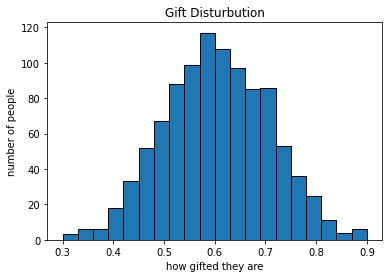

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N_people = 1000
life_period = 80

# 產生隨機數據
db = np.random.normal(loc=0.6, scale=0.1, size=(N_people))

#調整上下限
db[db > 0.9] = 0.9
db[db < 0.3] = 0.3

# 繪製長方圖
plt.hist(db, bins=20, edgecolor='black')

# 添加標籤和標題
plt.xlabel('how gifted they are')
plt.ylabel('number of people')
plt.title('Gift Disturbution')

# 顯示圖形
plt.show()

# Start

In [2]:
# 添加人生歷程 
life_advance = np.random.rand(N_people,life_period)

# 大於0.9視為好運 小於0.1視為壞運
life_advance[(life_advance >= 0.9)] = 2.0
life_advance[(life_advance >= 0.1) & (life_advance <= 0.9)] = 1
life_advance[(life_advance <= 0.1)] = 0.5

#跑結果 
def life_process(data ,arr): #data為gift分配 ,arr為 life_advance
    res = []
    for ind ,ele in enumerate(arr):
        val = data[ind]
        for j in ele:
            if j == 0.5:
                val /= 2
            elif j == 2:
                rd =  np.random.rand()
                if rd < data[ind]:
                    val *= 2
        res += val,
    return res

property1 = life_process(db ,life_advance)


# Analyze

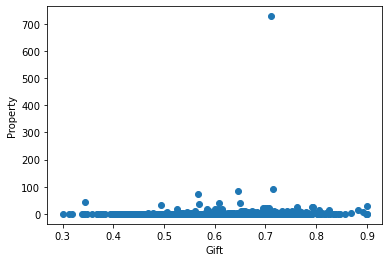

In [3]:
# 繪製長方圖
plt.scatter(db,property1)

# 添加標籤和標題
plt.xlabel('Gift')
plt.ylabel('Property')

# 顯示圖形
plt.show()


In [4]:
# 統計好運壞運次數
def compute_luck(data ,arr):
    luck = []
    for ind ,ele in enumerate(arr):  
        gift    = data[ind]
        count_1 = np.count_nonzero(ele == 0.5)
        count_2 = np.count_nonzero(ele == 2)
    
        luck += (gift ,count_1 ,count_2),
    return luck

luck = compute_luck(db ,life_advance)

# 找出最多財產的人
rich = property1.index(max(property1))
luck[rich]

# 找出最多好運的人的資料
# max_val = max(luck, key=lambda x: x[2])[2]
# max_positions = [i for i, v in enumerate(luck) if v[2] == max_val] 
# luck[867]


(0.7102895050528132, 3, 17)

          0         0
0  1.000000  0.058869
0  0.058869  1.000000


<AxesSubplot:>

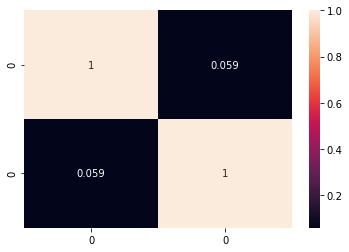

In [17]:
#相關分析
import pandas as pd
import seaborn as sns

df_db = pd.DataFrame(db)
df_property1 = pd.DataFrame(property1)
df = pd.concat([df_db, df_property1], axis=1 )

corr_matrix = df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True)

In [13]:
df_db

,0
0,0.526169
1,0.521570
2,0.606509
3,0.519113
4,0.588061
...,...
995,0.633260
996,0.656349
997,0.559518
998,0.541884


In [15]:
df_db = pd.DataFrame(db)
df_property1 = pd.DataFrame(property1)
df = pd.concat([df_db, df_property1], axis=1 )
df

,0,0
0,0.526169,0.032886
1,0.521570,0.130392
2,0.606509,0.018953
3,0.519113,0.064889
4,0.588061,0.018377
...,...,...
995,0.633260,0.158315
996,0.656349,0.041022
997,0.559518,0.017485
998,0.541884,0.002117


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

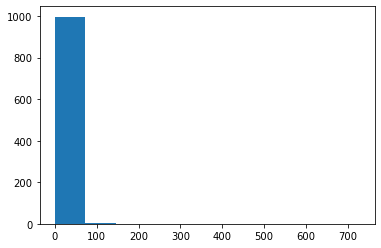

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = df_property1
# 計算平均值和中位數
mean = np.mean(data)
median = np.median(data)

# 繪製直方圖
fig, ax = plt.subplots()
ax.hist(data)

# 在圖表中標記平均值和中位數
ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(median, color='g', linestyle='dashed', linewidth=2, label='Median')

# 加上標籤和圖例
ax.set_xlabel('Data')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()